In [2]:
import matplotlib.pyplot as plt
from math import *
import numpy as np
from random import randint

In [3]:
def create_points(number,inf=0,sup=50):
    return [[randint(inf,sup),randint(inf,sup)] for i in range(number)]

def hull_plot(pts, convex_hull = None):
    xs,ys = zip(*pts)
    plt.scatter(xs,ys)
    if convex_hull !=None:
        for i in range(1,len(convex_hull)+1):
            if i == len(convex_hull):
                i=0
            c0 = convex_hull[i-1]
            c1 = convex_hull[i]
            plt.plot((c0[0],c1[0]),(c0[1],c1[1]),'r')
    plt.show()

In [4]:
def inicial_point(points):
    Min_ind= None
    Max_ind = None
    for i, (x, y) in enumerate(points):
    
        if Min_ind == None or x < points[Min_ind][0]:
            Min_ind = i
    
        if x ==points[Min_ind][0] and y < points[Min_ind][1]:
            Min_ind = i
    for i, (x, y) in enumerate(points):
    
        if Max_ind == None or x > points[Max_ind][0]:
            Max_ind = i
    
        if x ==points[Max_ind][0] and y > points[Max_ind][1]:
            Max_ind = i
    return Min_ind,Max_ind

In [5]:
def distance_reta(p0,p1,p2):
    a = p0[1] - p1[1]
    b = p1[0] - p0[0]
    c = p0[0]*p1[1] - p0[1]*p1[0]
    return abs(a*p2[0] + b*p2[1] +c)/sqrt(a**2 +b**2)

In [6]:
def create_seg(p1,p2,pts):
    above = []
    below = []
    if p2[0] - p1[0] == 0:
        return above,below
    m = (p2[1]-p1[1])/(p2[0] - p1[0])
    c= -m*p1[0] + p1[1]
    for pt in pts:
        if pt[1] > m*pt[0] + c:
            above.append(pt)
        if pt[1] < m*pt[0] + c:
            below.append(pt)
    return above,below

In [13]:
def divide(pts, show_progress = False):
    hull = []
    sort = sorted(pts,key = lambda x : x[0])
    p1 = sort[0]
    p2 = sort[-1]
    hull = hull + [p1,p2]
    del sort[0]
    del sort[-1]
    
    above, below = create_seg(p1,p2,sort)
    hull = hull + divide2(p1,p2,above,"above")
    hull = hull + divide2(p1,p2,below,"below")
    
    return hull
    
    

In [8]:
def divide2(p1,p2,seg,flag):
    if seg == [] or p1 == None or p2 == None:
        return []
    max_distance = -1
    max_point = None
    for i in seg:
        distance = distance_reta(p1,p2,i)
        if max_point == None or distance > max_distance:
            max_point = i
            max_distance = distance
    hull = []
    hull = hull + [max_point]
    del seg[seg.index(max_point)]
    
    p1a, p1b = create_seg(p1,max_point,seg)
    p2a, p2b = create_seg(max_point, p2 ,seg)
    if flag == "above":
        hull = hull + divide2(p1,max_point,p1a,"above")
        hull = hull + divide2(max_point,p2,p2a,"above")
    else:
        hull = hull + divide2(p1,max_point,p1b,"below")
        hull = hull + divide2(max_point,p2,p2b,"below")
    return hull
    

In [23]:
points = create_points(100)


In [24]:

hull = divide(points)

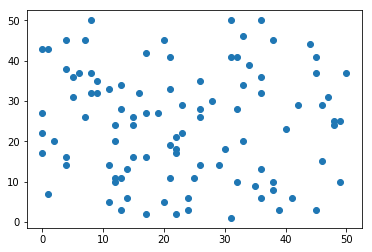

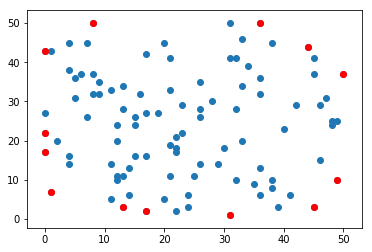

In [25]:

xs,ys = zip(*points)
plt.scatter(xs,ys)
zs,hs=zip(*hull)
#plt.scatter(zs,hs,c = 'r')
i,j = inicial_point(points)
points[i] , points[j] 
plt.show()

plt.scatter(xs,ys)
plt.scatter(zs,hs,c = 'r')
plt.show()
